#**IMPORTS** 📥

In [ ]:
#Imports para medir o tempo de execução e criação dos plots
import time
import matplotlib.pyplot as plt
import random

#**ALGORTIMO FORÇA-BRUTA** 🔨


## a) Descrição breve sobre o algoritmo de força bruta

> O algoritmo de força bruta, para contar o número de inversões de um dado array, funciona comparando todos os pares de elementos do mesmo, verificando quantas vezes um
 de valor superior se encontra à direita do seu par. Para tal, o código utiliza dois for loops para percorrer todas as combinações possíveis e verificar o que foi anteriormente descrito.







> ```
contar_inversoes_forca_bruta(A):
    //Input: array a contar, A, de tamanho n
    //Output: numero de inversoes
    contadador = 0
    for i = 1, …, n:
        for j = i+1, …, n:
            // (i)
            if a[i] > a[j]:
              contadador = contador + 1
        endfor
    endfor
    return contador
```




## b) Implementação do algoritmo descrito anteriormente

In [ ]:
def contar_inversoes_forca_bruta(v):
    n = len(v)
    res = 0

    for i in range(n):
        for j in range(i+1, n):
            if v[i] > v[j]:
                res += 1

    return res

In [ ]:
teste = [5, 1, 2, 4, 3]
print(contar_inversoes_forca_bruta(teste))

5


##c) Análise Assintótica

>(i) $\sum_{i=1}^{n} \sum_{j=i+1}^{n} 2 = \frac{2(n^2 - n)}{2}$ = $n^2 - n$

> $ T(N) = n^2 - n$

> Existe um limite superior igual a $O(n^2)$ e um limite inferior igual a $Ω(n^2) $, logo o limite exato igual a $Θ(n^2)$

> Podemos concluir que o tempo de execução do algoritmo por força bruta é quadrático em relação ao tamanho do array $(n^2)$. Essa conclusão é baseada na análise assintótica que considera o número de acessos ao array para a comparação de pares.





#**ALGORITMO DIVIDIR-E-CONQUISTAR** ⚔

##a) Solução para a melhoria do algoritmo utilizando um estratégia de dividir-e-conquistar

> De forma a melhorar significamente o algortimo, nesta estratégia de dividir-e-conquistar, foi utilizando uma abordagem bastante semelhante ao algortimo Mergesort, seguindo os seguintes passos:

> 1. [Dividir] Dividir, recursivamente, o array em duas metades iguais (ou com diferença de um elemento numa situação de $n = 2N + 1$)
> 2. [Conquistar] Percorrer as duas metades vizinhas, ordená-las, e contar quantas vezes um elemento superior se encontra do lado direito do seu par (verifica-se uma inversão)

### Pseudocódigo:
>
```
merge(A, B):
    //Input: metade do array a ordenar, A, de tamanho n
    //Input: metade do array a ordenar, B, de tamanho m
    //Output: array já ordenado
    //Output: numero de inversões encontradas

    ponteiro_esquerdo, ponteiro_direito, contador_inversoes = 0 //Ponteiros de ambos os arrays e contador de inversões inicializados a 0
    merged_array = [] //Array onde vão ser ordenadas as duas metades

      while i < 1,...,n and j < 1,...,m:  //Continua o ciclo até, pelo menos, uma das metades estar completamente analisada

      (i) if A[i] <= B[j]: //Faz dois acessos e verifica uma inversão

        (ii) merged_array.append(A[i]) //Adiciona o menor elemento ao array ordenado
            ponteiro_esquerdo++ //Incrementa o contador do lado esquerdo
          else:


       (iii) merged_array.append(A[i]) //Adiciona o menor elemento ao array ordenado
            ponteiro_direito++ //Incrementa o contador do lado direito
            contador_inversoes += n - ponteiro_esquerdo //Adiciona o numero de inversões proporcionais a n, menos o que já foi percorrido
          endif
      endwhile

      //Adiciona a metade, ou parte da mesma, não analisada, no final do array ordenado
      merged_array.extend(A[i:])
      merged_array.extend(B[j:])

      return merged_array, contador_inversoes //Devolve as inversões até ao momento o novo array ordenado
  ```

>
```
Função contar_inversoes_divide_conquer(v):
    //Input: Array a contar inversões, de tamanho n
    //Output: Array ordenado
    //Output: Número de inversões
  
    contador_inversoes = 0 //Contador de invesões inicializado a 0

    // Caso base: array de tamanho 1 ou menor
    if n <= 1:
        return v, inversoes

    // Divide o array ao meio
    meio = comprimento de v // 2
    array_esquerda = v[:meio]
    array_direita = v[meio:]

    // Chamada recursiva para os sub-arrays
    array_esquerda, inversoes_esquerda = contar_inversoes_divide_conquer(array_esquerda)
    array_direita, inversoes_direita = contar_inversoes_divide_conquer(array_direita)

    // Merge dos sub-arrays e contagem das inversões
    resultado_merge = merge(array_esquerda, array_direita)
    array_mesclado = resultado_merge[0]
    inversoes += inversoes_esquerda + inversoes_direita + resultado_merge[1]

    // Devolve o array ordenado e o número de inversões
    retorne array_mesclado, inversoes
```

## b) Implementaçao das duas funções para o divide-and-conquer

In [ ]:
def merge(esq, dir):
  i = j = count = 0
  merged_array = []

  while i < len(esq) and j < len(dir):
        if esq[i] <= dir[j]:
            merged_array.append(esq[i])
            i += 1
        else:
            merged_array.append(dir[j])
            j += 1
            count += len(esq) - i

  merged_array.extend(esq[i:])
  merged_array.extend(dir[j:])
  return merged_array, count


In [ ]:
def contar_inversoes_divide_conquer(v):
  inverted = 0
  if(len(v) <= 1):
    return v, inverted

  mid = len(v)//2
  esq = v[:mid]
  dir = v[mid:]
  esq, inver_esq = contar_inversoes_divide_conquer(v[:mid])
  dir, inver_dir = contar_inversoes_divide_conquer(v[mid:])

  res = merge(esq, dir)
  mergedArray = res[0]
  inverted += inver_esq + inver_dir + res[1]
  return mergedArray, inverted



##c) Prova pelo método de indução



### Hipótese de indução:

> Consideraremos que o algortimo devolve corretamente o numero de inversões para qualquer array de tamanho $n ≥ 0$, isto implica a que:
  1. Ordena corretamente o sub-array de tamanho $n/2$.
  2. Devolve corretamente o número de inversões do array de tamanho $n/2$.

*De forma a simplificar a prova, iremos assumir que o valor de $n$ é par, de modo a que k seja um número natural*

### Base de indução: $(n ≤ 1)$

> Um array com zero ou um elementos já se encontra ordenado, por esse motivo, não se verificam quaisquer inversões. A função retorna o array sem inversões:
```
iversoes = 0
if n <= 1:
        return v, inversoes
```

###Tese de indução:
> Pela nossa hipótese de indução, podemos assumir que o algoritmo funciona corretamente para $n = k$

> Iremos então analisar o caso de $n = k + 1$, tal que: $n > 1$

> 1. Divisão inicial do do array *v*, em sub-arrays: *array_esquerda*, *array_direita*. Com tamanho exato de $n/2$
```
    meio = comprimento de v // 2
    array_esquerda = v[:meio]
    array_direita = v[meio:]
```
> 2. Chamada recursiva da função em *array_esquerda* e *array_direita*, pela nossa hipótese de indução sabemos que:
   1. *array_esqueda* e *array_direta* estão corretamente ordenados.
   2. As inverões estão corretamente contabilizadas dentro dos respetivos sub-arrays.
```
array_esquerda, inversoes_esquerda = contar_inversoes_divide_conquer(array_esquerda)
array_direita, inversoes_direita = contar_inversoes_divide_conquer(array_direita)
```

> 3. Chamada da função *merge*:
 1. Iteração sobre os sub-vetores *array_esquerda* e *array_direita*, anexando-os ao *merged_array* de forma ordenada.
 2. Registo das inversões detetadas durante o merge entre sub-vetores.
 ```
 while i < 1,...,n and j < 1,...,m:  //Continua o ciclo até, pelo menos, uma das metades estar completamente analisada
          if A[i] <= B[j]: //Faz dois acessos e verifica uma inversão
            merged_array.append(A[i]) //Adiciona o menor elemento ao array ordenado
            ponteiro_esquerdo++ //Incrementa o contador do lado esquerdo
          else:
            merged_array.append(A[i]) //Adiciona o menor elemento ao array ordenado
            ponteiro_direito++ //Incrementa o contador do lado direito
            contador_inversoes += n - ponteiro_esquerdo //Adiciona o numero de inversões proporcionais a n, menos o que já foi percorrido
          endif
      endwhile
 ```
> 4. Return do array e das inversões:
>> Tanto os arrays *A* e *B*, (sub-arrays devolvidos após a chamada da função merge) estarão ordenados, pelo que podemos deduzir que qualquer inversão existente terá sido originada em:
  1. Inversões dentro do *array_esquerda* e do *array_direita*, contabilizados por, respetivamente, inversoes_esquerda e inversoes_direita.
  2. Inversões criadas durante o merge de *A* e *B*, contabilizados por *contador_inversoes*.
  ```
  resultado_merge = merge(array_esquerda, array_direita)
  inversoes += inversoes_esquerda + inversoes_direita + resultado_merge[1]
  ```

> Como a função *merge* lida corretamente com a respetiva fusão de vetores ordenados, e *contador_inversoes* conta corretamente o número de inversões nos respetivos arrays. O return da função *contar_inversoes_divide_conquer* refelete, corretamente, o vetor ordenado e o total de inversões.

##Conculsão:
> Por indução, o algortimo *divide-and-conquer* ordena corretamente o array de input e devolve as suas inversões para qualquer tamanho $n$



##d) Análise Assintótica

###Algoritmo Merge

> *   Em todos os possíveis casos de
(ii)-(iii), o algoritmo realiza um
mesmo número (c) constante de
acessos à memória
*  A soma dos tamanhos dos dois arrays A e B correspondem ao tamanho (n) do array resultante
* (i) $\sum_{k=1}^{n} 2 = 2n$
* (ii)-(iii) $\sum_{k=1}^{n} c = cn$
* $ T(N) = 2n + cn$
*  Existe um limite superior igual a $O(n)$ e um limite inferior igual a $Ω(n) $, logo o limite exato igual a $Θ(n)$
* Podemos concluir que o tempo de execução do algoritmo merge é linear em relação ao tamanho do array $(n)$.



###Teorema principal



*   Seja $f(n) ≤ O(n^d)$, d = 1, a função que descreve o trabalho requerido para compor soluções de subproblemas (algoritmo de merge).
*   Assumimos ainda, s.p.d.g., que $n$ é uma potência de $b$ $(𝑏^𝑘
, 𝑘 = 1, 2, …)$
* Então, a solução da recorrência
\begin{equation}
  T(N)=\begin{cases}
    Θ(1), & \text{se $n≤1$}\\
    2T(\frac n2) + f(n), & \text{c.c.}\\
  \end{cases}
\end{equation}
é dada por $T(N) = O(n\log(n))$, pois $a = b^d, a=2, b=2, d=1$

#**ANÁLISE EMPÍRICA** 📈

##Funcões auxiliares

Função que tem um valor de $O(n^2)$ para comparação com os algoritmos desenvolvidos

In [ ]:
def true_quadratic(v):
  size = len(v)
  count = 0
  for i in range(size):
    for j in range(size):
      count = count + 1

  return count


Função que tem um valor de $O(nLog(n))$ para comparação com os algoritmos desenvolvidos

Fonte do mergeSort: https://www.geeksforgeeks.org/python-program-for-merge-sort/

In [ ]:
def mergeSort(arr):
  return mergeSortAux(arr, 0, len(arr) - 1)

def mergeSortAux(arr, l, r):
    if l < r:

        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2

        # Sort first and second halves
        mergeSortAux(arr, l, m)
        mergeSortAux(arr, m+1, r)
        mergeMergeSort(arr, l, m, r)

    return arr

def mergeMergeSort(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m

    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)

    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

    # l is for left index and r is right index of the
    # sub-array of arr to be sorted



In [ ]:
def make_ranking_list(n):
  sorted = [ i+1 for i in range(n) ]
  res = []
  for i in range(0,n):
      c = random.choice(sorted)
      res.append(c)
      sorted.remove(c)

  return res

##a) Cronometragem do tempo de execução de um função *myFn*

In [ ]:
def test_inversion_evaluator_aux(myFn, nVals, lst, numTrials=35):
    nValues = []
    tValues = []
    for n in nVals:
        # run myFn n times
        runtime = 0
        #print("Testing for n = " + str(n))
        for t in range(numTrials):
            start = time.time()             # start timer just before executing the function
            myFn(lst[n])
            end = time.time()               # stop the timer as soon as the funcion stops
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

##b) Plot dos algortimos anteriormente apresentados

*O plot das quatro funções é o mesmo tanto nesta imagem como naquela apresentada no output da próxima função, a única diferença é que esta foi corrida localmente para não haver picos por motivos como a ligação à internet.
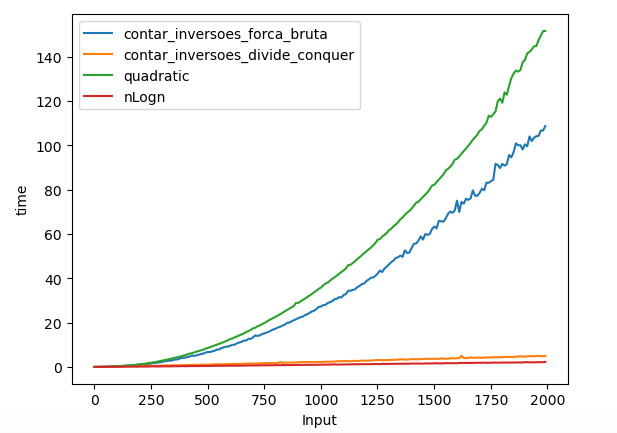

> Plot dos dois algortimos apresentados anteriormente, juntamente com um algortimo quadrático $n^2$ (verde) e outro n-logarítmico $nLog(n)$ (vermelho). Para n <= 2000, com um intervalo de 10

Making testing array
Testing contar_inversoes_forca_bruta (548303.09ms)
Testing contar_inversoes_divide_conquer (33100.8ms)
Testing true_quadratic (593319.92ms)
Testing mergeSort (31774.05ms)


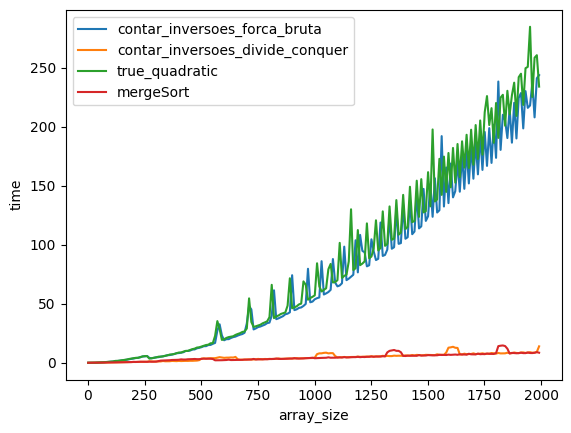

In [ ]:
def test_inversion_evaluator(fnList, tam_maximo, intervalo):
  lst = []
  print("Making testing array")
  for i in range(tam_maximo):
    lst.append(make_ranking_list(i))

  n_vals = list(range(1, tam_maximo, intervalo))
  for fn in fnList:
    print("Testing " + fn.__name__, end = " ")
    start = time.time()
    nValues, tValues = test_inversion_evaluator_aux(fn, n_vals, lst)
    end = time.time()
    runtime = (end - start) * 1000
    plt.plot(nValues, tValues, label=fn.__name__)
    print("("+  str(round(runtime, 2)) + "ms)")

  plt.xlabel('array_size')
  plt.ylabel('time')
  plt.legend()
  plt.show()

test_inversion_evaluator([contar_inversoes_forca_bruta, contar_inversoes_divide_conquer, true_quadratic, mergeSort], 2000, 10)


Ao analisar o gráfico, podemos concluir que as hipóteses obtidas anteriormente estão corretas.

 O algoritmo de força bruta tem uma complexidade de $O(n^2)$, facilmente identificada pela sua forma parabólica e empiricamente comprovada também pela sua semelhança com um algortimo $n^2$.
 Já a versão melhorada *dividir-e-conquistar* tem um complexidade logarítmica $nLog(n)$, bastante parecido ao algortimo merge sort com complexidade também $nLog(n)$.
 Em suma, este gráfico permitem-nos concluir e visualizar o que foi posteriormente provado sobre, tanto as análises assintóticas, como os tempos de complexidade.

#**EXTRA** ➕

In [ ]:
def merge_improved(esq, dir):
  i = j = count = 0
  merged_array = []
  tam_esq = len(esq)
  tam_dir = len(dir)

  while i < tam_esq and j < tam_dir:
        if esq[i] <= dir[j]:
            merged_array.append(esq[i])
            i += 1
        else:
            merged_array.append(dir[j])
            j += 1
            count += tam_esq - i

  merged_array.extend(esq[i:])
  merged_array.extend(dir[j:])
  return merged_array, count

Making testing array
Testing contar_inversoes_divide_conquer (32978.36ms)
Testing contar_inversoes_divide_conquer_improved (27484.93ms)
Testing mergeSort (32000.05ms)


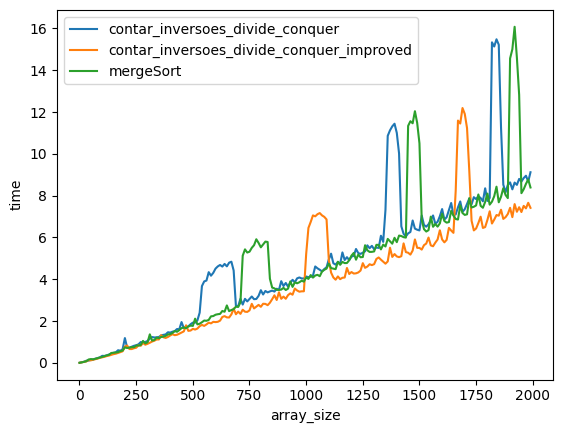

In [ ]:
def contar_inversoes_divide_conquer_improved(v):
  inverted = 0
  if(len(v) <= 1):
    return v, inverted

  mid = len(v)//2
  esq = v[:mid]
  dir = v[mid:]
  esq, inver_esq = contar_inversoes_divide_conquer_improved(v[:mid])
  dir, inver_dir = contar_inversoes_divide_conquer_improved(v[mid:])

  mergedArray, inver_count = merge_improved(esq, dir)
  inverted += inver_esq + inver_dir + inver_count
  return mergedArray, inverted

test_inversion_evaluator([contar_inversoes_divide_conquer, contar_inversoes_divide_conquer_improved, mergeSort], 2000, 10)

De forma a otimizar o código, é guardado, em cada chamada recursiva, o tamanho atual dos dois vetores que estão a ser iterados, ordenados, e analisados para inversões. Para além disso, é armazenado diretamente o valor do *merged_improved(esq, dir)* na variável de retorno, sem dar uso a array de tamanho dois temporário, diminuindo assim o acesso em 1 (praticamente insignificante)

Ao fazer esta pequena alteração no código, deve-se verificar uma otimização ligeira no tempo de execução. Apesar disso, a complexidade manter-se-á em $O(nLog(n))$, isto, já que, o custo da função len() em python é apenas $O(1)$ em listas.

A forma mais fácil de analisar esta diferença será empiricamente:

*Imagem adicionada caso o google colab não guarde o output da função anterior e que garante que não haja qualquer influência por parte da  ligação à rede
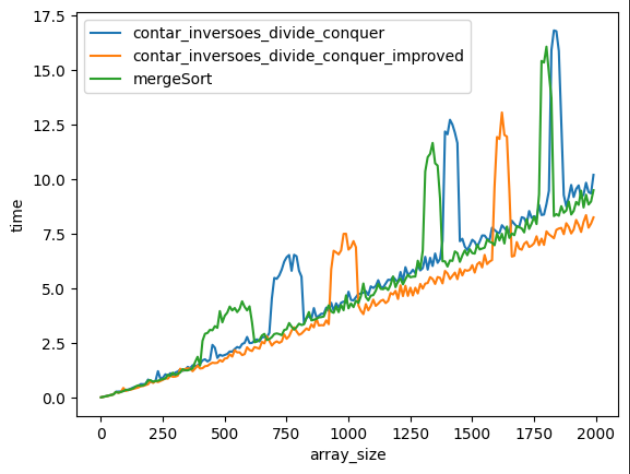
> Tal como podemos ver, apesar de não haver uma mudança na complexidade do algoritmo, o mesmo é ligeiramente mais rápido que a primeira versão.

In [ ]:
test_inversion_evaluator([contar_inversoes_divide_conquer, contar_inversoes_divide_conquer_improved, mergeSort], 2000, 10)

# **QUESTÕES ÉTICAS** ⚖️



## a) Colaboração no projeto

Para a realização do trabalho, não houve qualquer colaboração com outro grupo.

## b) Fontes

Para além do material disponibilizado na U.C., foi também utilizado, tal como indicado anteriormente, uma função do mergeSort desenvolvida por: https://www.geeksforgeeks.org/.

A função não foi desenvolvida por nós para que houvesse um termo de comparação que não estivesse enviesado.



Autores:

Francisco Brito, nº 111445

Guilherme Penedo, nª 111222